<a href="https://colab.research.google.com/github/OmarFarukNoman/Into-to-Machine-Learning/blob/main/Homework-1/Problem_1(c).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 2.72877448 -0.46406656]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63212032 3.63210833 3.63209639]
Final cost = 3.632096391736313


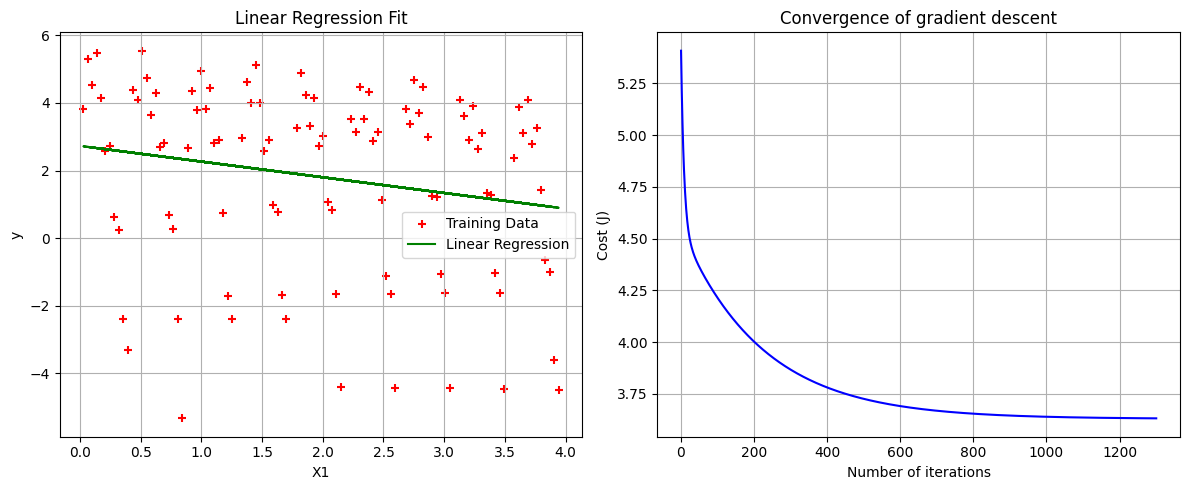

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset D3 from the github link
url = "https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv"
df = pd.read_csv(url)

# Separate input (X1) and output (y)
X = df.values[:, 2]  # Input from the first column (X3)
y = df.values[:, 3]  # Output from the 4th column (y)
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

X_0 = np.ones((m, 1)) # For X0
X_3 = X.reshape(m, 1) # For X3
X = np.hstack((X_0, X_3)) # Stack X0 and X3 together in matrix

theta = np.zeros(2)

# Cost Calculation
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    H_x = X.dot(theta) # H(x) calculation
    errors = np.subtract(H_x, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        H_x = X.dot(theta)
        errors = np.subtract(H_x, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

theta = [0., 0.]
iterations = 1300
alpha = 0.01

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final cost =', cost_history[-1])

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: Linear regression fit
plt.subplot(1, 2, 1)
plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')
plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
plt.grid(True)
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Second subplot: Convergence of gradient descent
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()